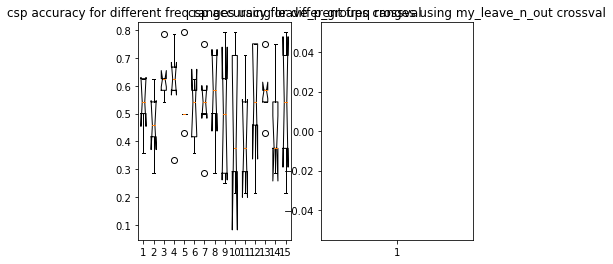

In [2]:
import sys
import matplotlib.pyplot as plt
import pickle
import mne
import xgboost as xgb
from sklearn.metrics import accuracy_score
sys.path.append("..")
from utils.csp_example import custom_CSP, LDA, Pipeline
from utils.features_utils import CSP_LDA_features, block_crossval

csp_decoder = custom_CSP(n_components=4, log=True,
                         cov_kwargs={'method': 'ledoit_wolf'})

model = Pipeline(steps=[('spatial_filtering', csp_decoder),
                        ('decoder', LDA())])

#exps = [str(n) for n in range(3, 11)]
exps = ["1"]

for exp in exps:
    #epochs = mne.read_epochs("data/VP" + exp + "_epo.fif").crop(0, 6)
    #ica_model = mne.preprocessing.read_ica("data/VP" + exp + "_ica.fif")

    bscores_lng = []
    bscores_lno = []

    search_range = range(5, 35, 2)

    with open('results/csp_' + exp + '_lng_acc.pickle', 'rb') as handle:
        bscores_lng = pickle.load( handle)
    with open('results/csp_' + exp + '_lno_acc.pickle', 'rb') as handle:
        bscores_lng = pickle.load( handle)

fig, axs = plt.subplots(1,2)
axs[0].boxplot(bscores_lng,[str(n)+ " " + str(n+2) for n in search_range], )
axs[0].set_title("csp accuracy for different freq ranges using leave_p_groups crossval")
axs[0].set_ylim(0,1)
axs[1].boxplot(bscores_lno,[str(n)+ " " + str(n+2) for n in search_range])
axs[1].set_title("csp accuracy for different freq ranges using my_leave_n_out crossval")
axs[1].set_ylim(0,1)
plt.show()
